In [1]:
import os, io
from google.cloud import vision_v1
from google.cloud.vision_v1.types import Image, Feature
import pandas as pd

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'fourth-carport-383810-4d0a7d89c87c.json'
client = vision_v1.ImageAnnotatorClient()

file_name = 'appllogo.jpg'
image_folder = './'


image_path = os.path.join(image_folder, file_name)

with io.open(image_path, 'rb') as image_file:
    content = image_file.read()
    
image = Image(content=content)
response = client.logo_detection(image=image)
logos = response.logo_annotations

for logo in logos:
    print('Logo Description:', logo.description)
    print('Confidence Score:', logo.score)
    print('-'*50)
    
    logo_name = logo.description

print("LOGO DETECTED: ", logo_name)
symbol_df = pd.read_excel('YfinanceSymbols.xlsx')
df = symbol_df[symbol_df["Name"] == logo.description]
s_list = df['Ticker'].tolist()
symbol = s_list[0]
print("YFINANCE SYMBOL: ", symbol)
print('-'*30)


#STOCK PREDICTION CODE


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

# For time stamps
from datetime import datetime


# Set up End and Start times for data grab

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

#getting stocks from yfinance api
stock_df = yf.download(symbol, start, end)
stock_df.tail(10)
stock_df.describe()
# company_list = [symbol]


Logo Description: Apple Inc.
Confidence Score: 0.994799017906189
--------------------------------------------------
LOGO DETECTED:  Apple Inc.
YFINANCE SYMBOL:  AAPL
------------------------------
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,149.181120,151.232240,147.362800,149.406680,149.024501,7.994827e+07
std,10.602433,10.482986,10.753316,10.681784,10.671205,2.486603e+07
min,126.010002,127.769997,124.169998,125.019997,124.829399,3.519590e+07
25%,142.099998,143.722496,139.924995,142.457497,141.965424,6.404150e+07
50%,148.864998,150.889999,147.200005,149.295006,148.892677,7.478095e+07
75%,156.062500,158.015003,154.034996,156.720005,155.844021,8.907682e+07
max,173.750000,176.149994,173.119995,174.550003,173.995270,1.826020e+08


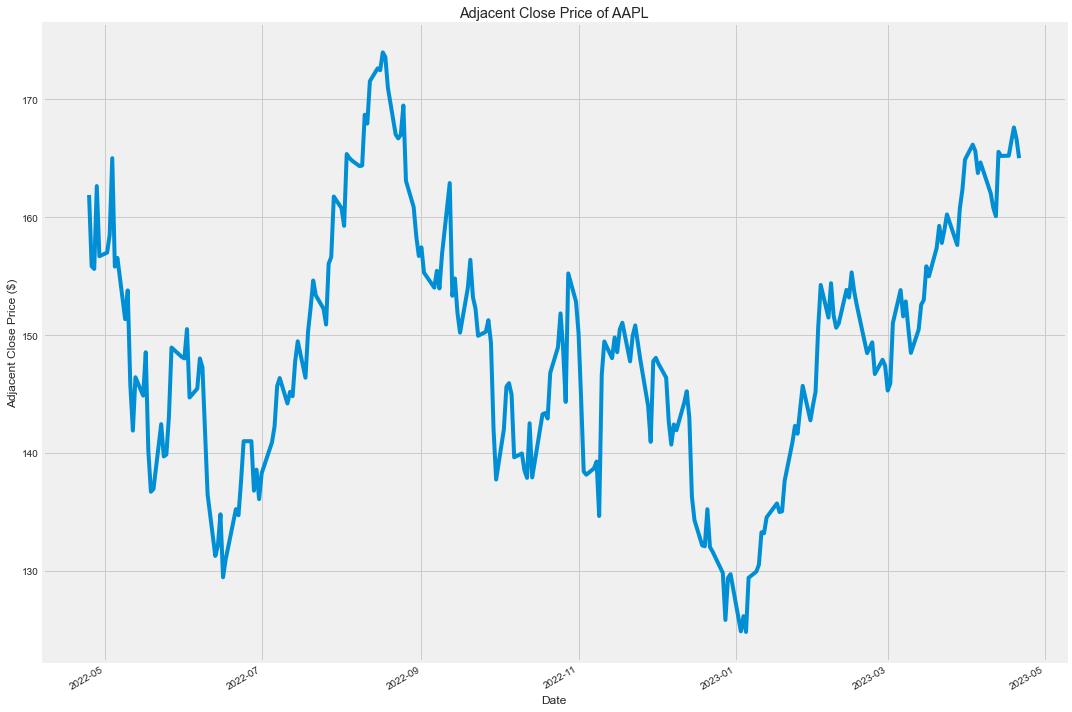

In [2]:
# plt.figure(figsize=(15, 10))
# plt.subplots_adjust(top=1.25, bottom=1.2)

# for i, company in enumerate(company_list, 1):
#     plt.subplot(2, 2, i)
#     company['Adj Close'].plot()
#     plt.ylabel('Adj Close')
#     plt.xlabel(None)
#     plt.title(f"Closing Price of {tech_list[i - 1]}")
    
# plt.tight_layout()

plt.title(f"Adjacent Close Price of {symbol}")
plt.xlabel("Date")
plt.ylabel("Adjacent Close Price ($)")
stock_df['Adj Close'].plot(figsize=(15, 10))
# show the plot
# plt.show()
plt.tight_layout()


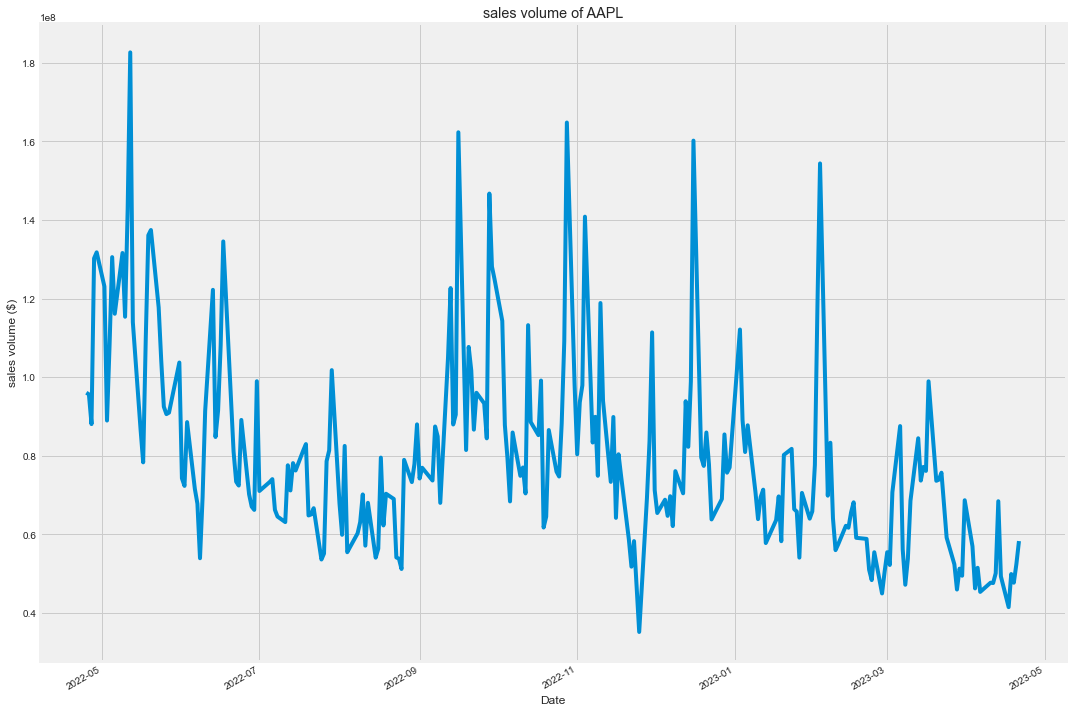

In [3]:


plt.title(f"sales volume of {symbol}")
plt.xlabel("Date")
plt.ylabel("sales volume ($)")
stock_df['Volume'].plot(figsize=(15, 10))
# show the plot
# plt.show()
plt.tight_layout()

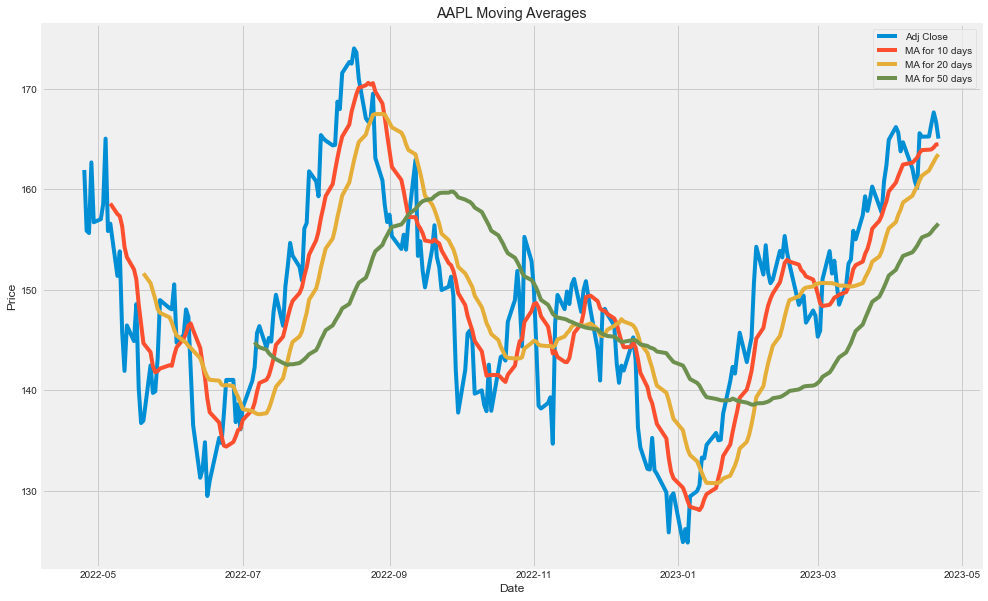

In [4]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    stock_df[column_name] = stock_df['Adj Close'].rolling(ma).mean()

# Plot the Adj Close price and moving averages
plt.figure(figsize=(15, 10))
plt.plot(stock_df['Adj Close'], label='Adj Close')
plt.plot(stock_df['MA for 10 days'], label='MA for 10 days')
plt.plot(stock_df['MA for 20 days'], label='MA for 20 days')
plt.plot(stock_df['MA for 50 days'], label='MA for 50 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"{symbol} Moving Averages")
plt.legend()
plt.show()



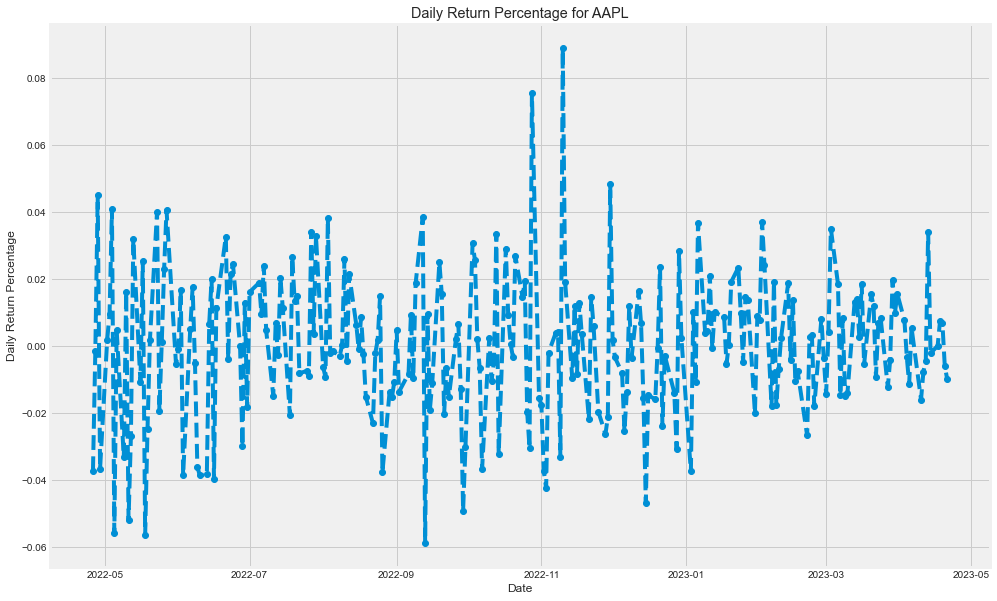

In [5]:
# Create a new column for daily return percentage
stock_df['Daily Return'] = stock_df['Adj Close'].pct_change()

# Plot the daily return percentage
plt.figure(figsize=(15, 10))
plt.plot(stock_df['Daily Return'], linestyle='--', marker='o')
plt.xlabel('Date')
plt.ylabel('Daily Return Percentage')
plt.title('Daily Return Percentage for ' + symbol)
plt.show()

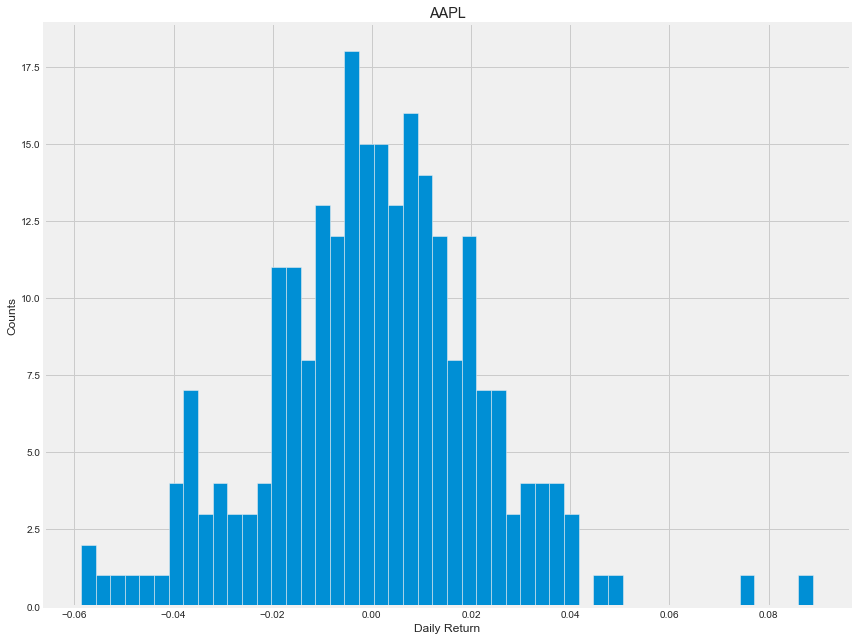

In [6]:
plt.figure(figsize=(12, 9))

stock_df['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title(f'{symbol}')
    
plt.tight_layout()

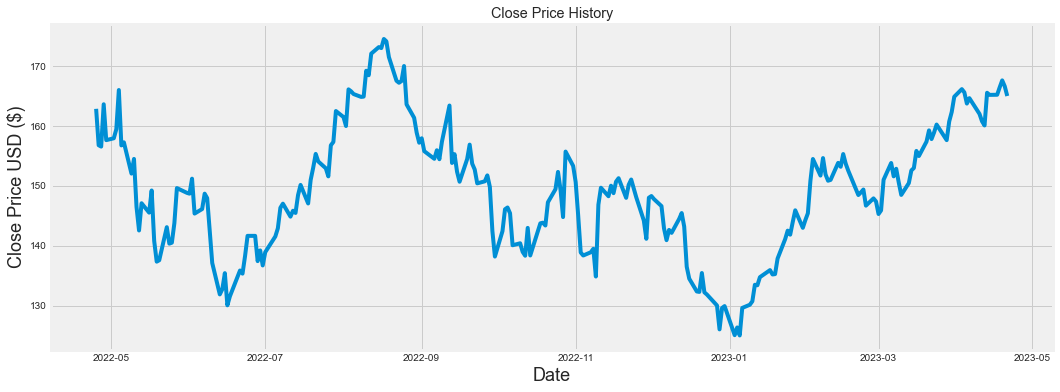

In [7]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(stock_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [8]:
# Create a new dataframe with only the 'Close column 
data = stock_df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

238

In [9]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.76438529],
       [0.64163138],
       [0.63698782],
       [0.77972941],
       [0.65879251],
       [0.6650516 ],
       [0.69573985],
       [0.82778119],
       [0.64102571],
       [0.65132239],
       [0.54593171],
       [0.59539661],
       [0.43367657],
       [0.35412878],
       [0.44599235],
       [0.41429425],
       [0.48899668],
       [0.31899876],
       [0.2489402 ],
       [0.25378555],
       [0.36523322],
       [0.30971133],
       [0.31294177],
       [0.37876034],
       [0.49707247],
       [0.48092059],
       [0.47829612],
       [0.52877058],
       [0.41106411],
       [0.42640824],
       [0.47829612],
       [0.46315379],
       [0.355744  ],
       [0.24449842],
       [0.13850207],
       [0.15626886],
       [0.21017554],
       [0.10175652],
       [0.13204119],
       [0.2190591 ],
       [0.20856063],
       [0.26751476],
       [0.3359581 ],
       [0.3359581 ],
       [0.2507572 ],
       [0.28689677],
       [0.23622053],
       [0.280

In [10]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.76438529, 0.64163138, 0.63698782, 0.77972941, 0.65879251,
       0.6650516 , 0.69573985, 0.82778119, 0.64102571, 0.65132239,
       0.54593171, 0.59539661, 0.43367657, 0.35412878, 0.44599235,
       0.41429425, 0.48899668, 0.31899876, 0.2489402 , 0.25378555,
       0.36523322, 0.30971133, 0.31294177, 0.37876034, 0.49707247,
       0.48092059, 0.47829612, 0.52877058, 0.41106411, 0.42640824,
       0.47829612, 0.46315379, 0.355744  , 0.24449842, 0.13850207,
       0.15626886, 0.21017554, 0.10175652, 0.13204119, 0.2190591 ,
       0.20856063, 0.26751476, 0.3359581 , 0.3359581 , 0.2507572 ,
       0.28689677, 0.23622053, 0.28083978, 0.333939  , 0.36139712,
       0.43064823, 0.44457892, 0.40076713, 0.42075512, 0.413285  ,
       0.47345047, 0.50777303, 0.44518489, 0.52453059, 0.56571761])]
[0.6123562595608103]

[array([0.76438529, 0.64163138, 0.63698782, 0.77972941, 0.65879251,
       0.6650516 , 0.69573985, 0.82778119, 0.64102571, 0.65132239,
       0.54593171, 0.59539661, 0.433

In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

178/178 [==============================] - 11s 41ms/step - loss: 0.0220


In [12]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 2s 2s/step


2.384612170923292

C:\Users\SHREYA\AppData\Local\Temp\ipykernel_19888\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


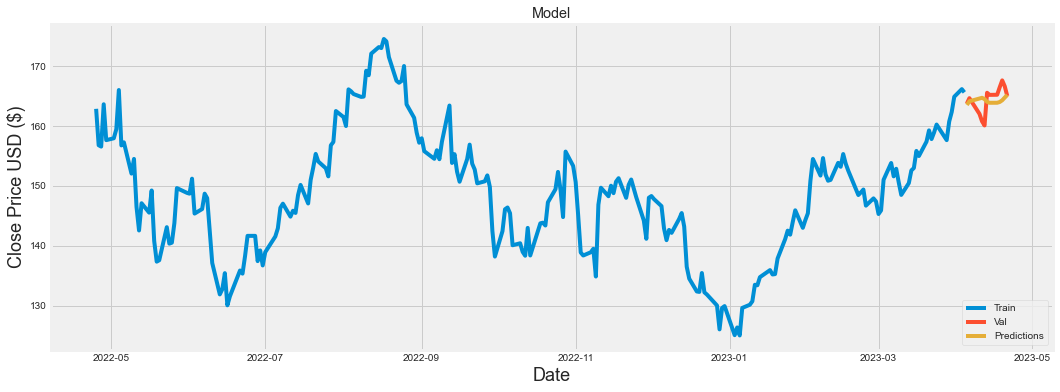

In [13]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [14]:
valid

,Close,Predictions
Date,,
2023-04-05,163.759995,163.535736
2023-04-06,164.660004,164.138962
2023-04-10,162.029999,164.604752
2023-04-11,160.800003,164.722198
2023-04-12,160.100006,164.510712
2023-04-13,165.559998,164.049728
2023-04-14,165.210007,163.889252
2023-04-17,165.229996,163.894592
2023-04-18,166.470001,164.019135
